<a href="https://colab.research.google.com/github/tellosofia/Moosic_Unsupervised-ML/blob/main/Moosic_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
set_config(transform_output='pandas')
import warnings
warnings.filterwarnings("ignore")

#Data Preparation

In [20]:
# load dataframe

# url that contains the dataset
url = "https://drive.google.com/file/d/1Ha-dl6_ctjd1DxO9ZGGoDyHK4NQ3vUiJ/view?usp=sharing"
# path to dataset
path = f"https://drive.google.com/uc?export=download&id={url.split('/')[-2]}"
# read dataset
songs_5000 = pd.read_csv(path)

# create a copy to avoid changing original
songs = songs_5000.copy()

In [21]:
# remove spaces
songs.columns = songs.columns.str.strip()

# drop duplicates
songs.drop_duplicates(inplace=True)

# show first row
songs.head(1)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.259,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...


In [22]:
# drop columns we won't use:
# 'type' column is nan
# based on their description, team agrees to drop following audio features: key, duration_ms, time_signature

# keep only selected columns, axis = 1 means columns
songs = songs.drop(["type", "key", "duration_ms", "time_signature"], axis = 1)

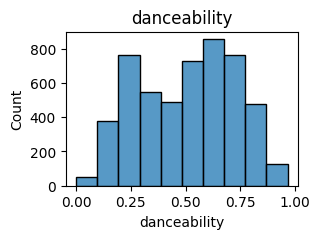

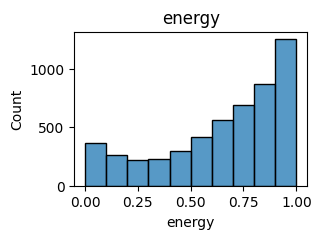

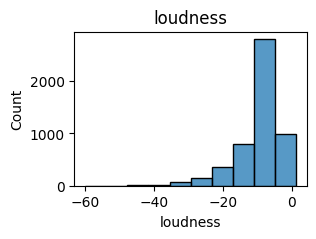

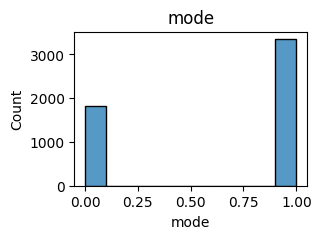

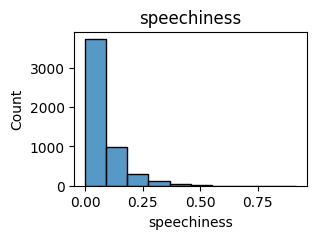

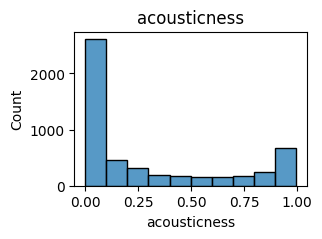

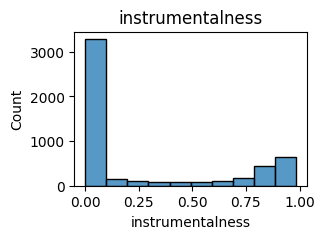

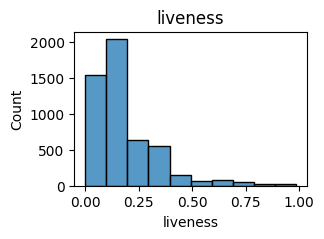

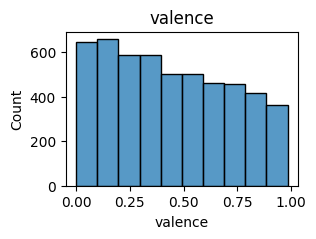

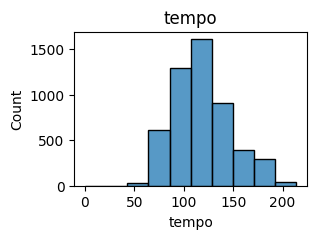

In [23]:
# create histograms of kept audio features to see the distribution of their values

fig, ax = plt.subplots(figsize=(3, 2))
sns.histplot(data=songs, x='danceability', bins = 10)
plt.title('danceability')
plt.show()

fig, ax = plt.subplots(figsize=(3, 2))
sns.histplot(data=songs, x='energy', bins=10)
plt.title('energy')
plt.show()

fig, ax = plt.subplots(figsize=(3, 2))
sns.histplot(data=songs, x='loudness', bins = 10)
plt.title('loudness')
plt.show()

fig, ax = plt.subplots(figsize=(3, 2))
sns.histplot(data=songs, x='mode', bins = 10)
plt.title('mode')
plt.show()

fig, ax = plt.subplots(figsize=(3, 2))
sns.histplot(data=songs, x='speechiness', bins = 10)
plt.title('speechiness')
plt.show()

fig, ax = plt.subplots(figsize=(3, 2))
sns.histplot(data=songs, x='acousticness', bins = 10)
plt.title('acousticness')
plt.show()

fig, ax = plt.subplots(figsize=(3, 2))
sns.histplot(data=songs, x='instrumentalness', bins = 10)
plt.title('instrumentalness')
plt.show()

fig, ax = plt.subplots(figsize=(3, 2))
sns.histplot(data=songs, x='liveness', bins = 10)
plt.title('liveness')
plt.show()

fig, ax = plt.subplots(figsize=(3, 2))
sns.histplot(data=songs, x='valence', bins = 10)
plt.title('valence')
plt.show()

fig, ax = plt.subplots(figsize=(3, 2))
sns.histplot(data=songs, x='tempo', bins = 10)
plt.title('tempo')
plt.show()

In [24]:
songs.iloc[:, 2:-2].head(1)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.658,0.259,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376


In [25]:
# use .corr to see the correlation between audio features
songs_corr = songs.iloc[:, 2:-2].corr()
songs_corr

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,0.039334,0.356393,-0.087293,0.038340,-0.108556,-0.573060,-0.030214,0.680939,-0.008300
energy,0.039334,1.000000,0.787657,-0.008561,0.305357,-0.852191,-0.170407,0.171439,0.158066,0.212121
loudness,0.356393,0.787657,1.000000,-0.029024,0.234693,-0.697795,-0.470637,0.136280,0.335834,0.213217
mode,-0.087293,-0.008561,-0.029024,1.000000,-0.042218,0.027490,-0.004408,-0.009503,0.006748,0.004366
speechiness,0.038340,0.305357,0.234693,-0.042218,1.000000,-0.266313,-0.064762,0.085881,-0.010991,0.061100
acousticness,-0.108556,-0.852191,-0.697795,0.027490,-0.266313,1.000000,0.194246,-0.104077,-0.131100,-0.187919
instrumentalness,-0.573060,-0.170407,-0.470637,-0.004408,-0.064762,0.194246,1.000000,-0.053382,-0.501546,-0.071307
liveness,-0.030214,0.171439,0.136280,-0.009503,0.085881,-0.104077,-0.053382,1.000000,0.009975,0.037370
valence,0.680939,0.158066,0.335834,0.006748,-0.010991,-0.131100,-0.501546,0.009975,1.000000,0.101754
tempo,-0.008300,0.212121,0.213217,0.004366,0.061100,-0.187919,-0.071307,0.037370,0.101754,1.000000


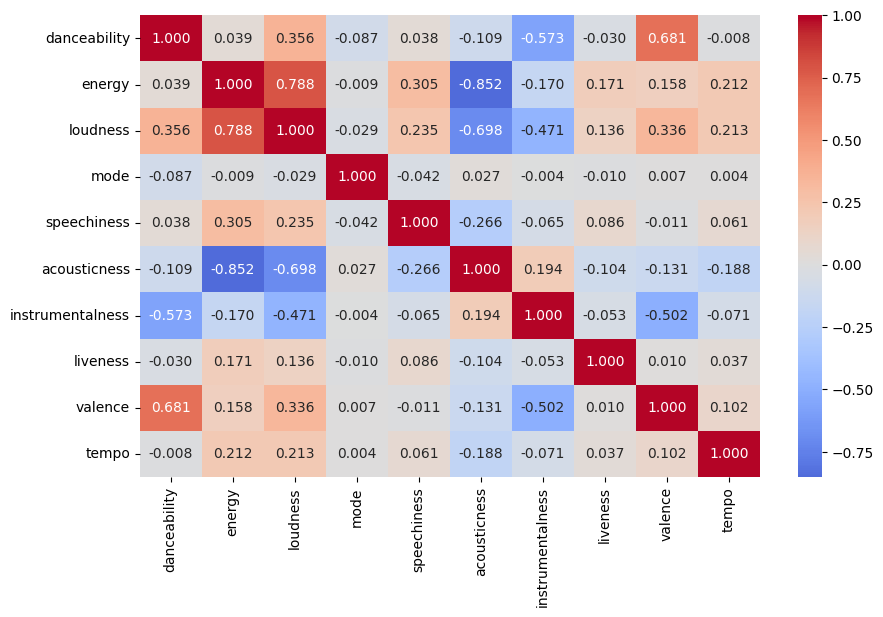

In [26]:
# import pairwise_distances from sklearn.metrics
from sklearn.metrics import pairwise_distances

# set size of the figure
plt.subplots(figsize=(10, 6))
# use a heatmeap to visualise previously calculated correlations
sns.heatmap(songs_corr, cmap='coolwarm', center = 0,  annot=True, fmt=".3f");

In [27]:
# create a dataframe from energy to explore it a bit further
energy = songs_corr['energy']
energy = pd.DataFrame(energy)

In [28]:
# sort values in descending order
energy.sort_values(by='energy', ascending=False, inplace=True)

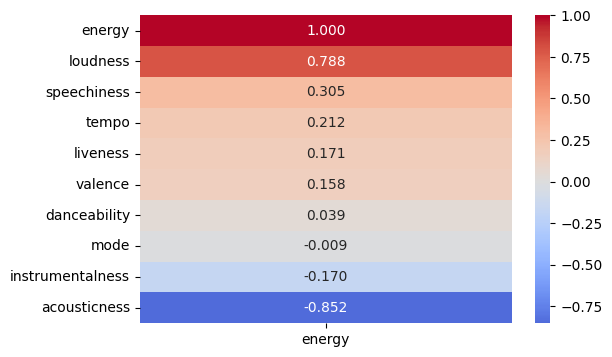

In [30]:
# define size of the figure
plt.subplots(figsize=(6, 4))
# plot a heatmap to see the correlation between energy and other features
sns.heatmap(energy, cmap='coolwarm', center = 0,  annot=True, fmt=".3f");
# energy appears to have a strong correlation with acousticness and loudness, which could mean energy could be dropped

In [ ]:
# import VarianceThreshold from sklearn
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold object with a threshold of (.9 * (1 - .9))
sel = VarianceThreshold(threshold=(.9 * (1 - .9)))
# Fit the VarianceThreshold object to the data and transform the data
sel.fit_transform(songs.iloc[:, 2:-2])
# Transform the data using the previously fitted VarianceThreshold object
sel.transform(songs.iloc[:, 2:-2])
# songs_var = songs.var(axis = 0)
# songs_var

,loudness,mode,acousticness,instrumentalness,tempo
0,-13.141,0.0,0.694,0.000059,110.376
1,-12.646,1.0,0.217,0.000002,125.039
2,-11.048,1.0,0.453,0.000063,93.698
3,-18.115,1.0,0.879,0.000041,106.802
4,-19.807,1.0,0.916,0.000343,120.941
...,...,...,...,...,...
5230,-23.390,1.0,0.917,0.715000,87.906
5231,-21.873,1.0,0.855,0.426000,83.134
5232,-42.959,1.0,0.951,0.969000,71.573
5233,-29.443,1.0,0.883,0.505000,67.109


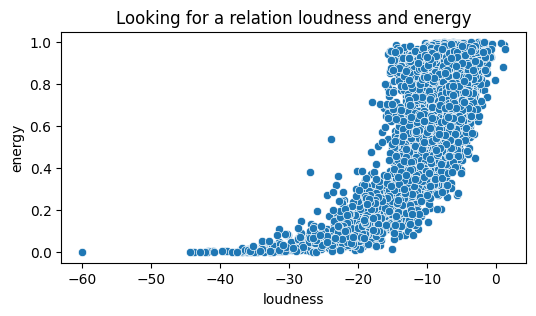

In [ ]:
# visualising the correlation between  energy and loudness
fig, ax = plt.subplots(figsize=(6, 3))
sns.scatterplot(data=songs, x='loudness', y='energy')
plt.title('Looking for a relation loudness and energy')
plt.show()

# the graph is not linear, shows a quadratic relation - not a good way to support removing energy

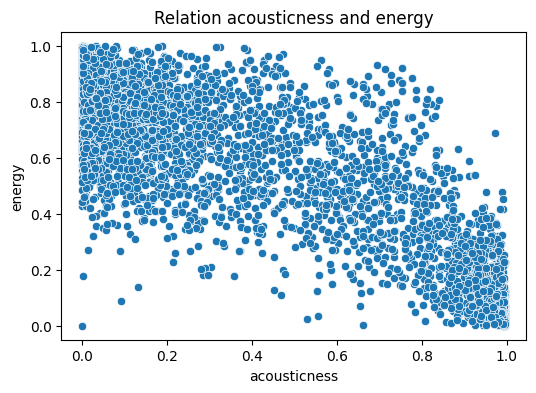

In [ ]:
# visualising the correlation between acousticness and energy
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=songs, x='acousticness', y='energy')
plt.title('Relation acousticness and energy')
plt.show()

# this graph does show a linear relation?????

In [31]:
# energy is also dropped due to it's high correlation with loudness and acousticness

songs = songs.drop('energy', axis=1)

In [32]:
# to check the columns in songs
songs.columns

Index(['name', 'artist', 'danceability', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'id', 'html'],
      dtype='object')

# Data modelling

In [33]:
# scale features
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler

# to scale only the numeric columns
to_scale = ['danceability', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# to make a copy of the original
scaled_songs = songs.copy()

# to replace the original values with the scaled ones
scaled_songs[to_scale] = MinMaxScaler().fit_transform(songs[to_scale]) # we decide to use minmaxscaler
#scaled_songs[to_scale] = StandardScaler().fit_transform(songs[to_scale])

# show first row of scaled_songs
scaled_songs.head(1)

,name,artist,danceability,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.680455,0.763897,0.0,0.076797,0.696787,0.00006,0.987842,0.31066,0.5158,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...


In [34]:
# choosing only the columns we need
scaled_songs.iloc[:, 2:-2]

,danceability,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.680455,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800
1,0.767322,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322
2,0.880041,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862
3,0.729059,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098
4,0.673216,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171
...,...,...,...,...,...,...,...,...,...
5230,0.208893,0.596818,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795
5231,0.194416,0.621548,1.0,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495
5232,0.061634,0.277803,1.0,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469
5233,0.137539,0.498142,1.0,0.045643,0.886546,0.512690,0.112462,0.060000,0.313608


### Elbow method

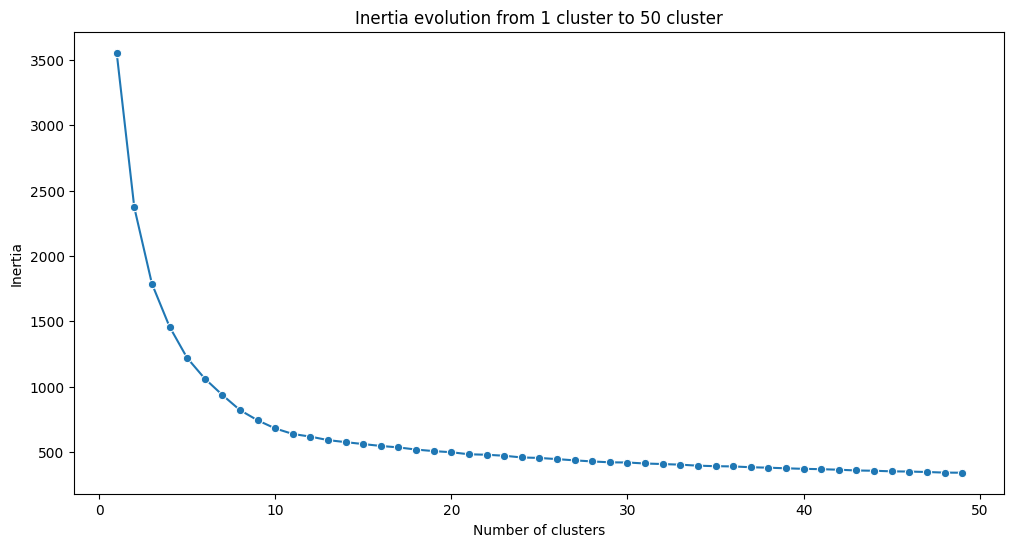

In [35]:
# to check the inertia with KMeans - following the elbow method

# importing necessary libraries
from sklearn.cluster import KMeans

# define the maximum number of clusters to evaluate
max_k = 50
# initialize an empty list to store inertia values for each number of clusters
inertia = []

# iterate over the range of cluster numbers from 1 to max_k (exclusive)
for k in range(1, max_k):
    # create a KMeans clustering model with k clusters
    # fit the model to the scaled data (excluding the first two and last two columns)
    # calculate and append the inertia (sum of squared distances of samples to their closest cluster center)
    inertia.append(KMeans(n_clusters=k, random_state = 30).fit(scaled_songs.iloc[:, 2:-2]).inertia_)

# create a figure and axis object for plotting
fig, ax = plt.subplots(figsize=(12, 6))
# set plot title, max_k-1 because range stops at max_k-1
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
# plot the inertia values against the number of clusters
sns.lineplot(x=range(1, max_k), y=inertia, marker='o')
# set labels for x and y axes
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
# display plot
plt.show()

###Silhouette score

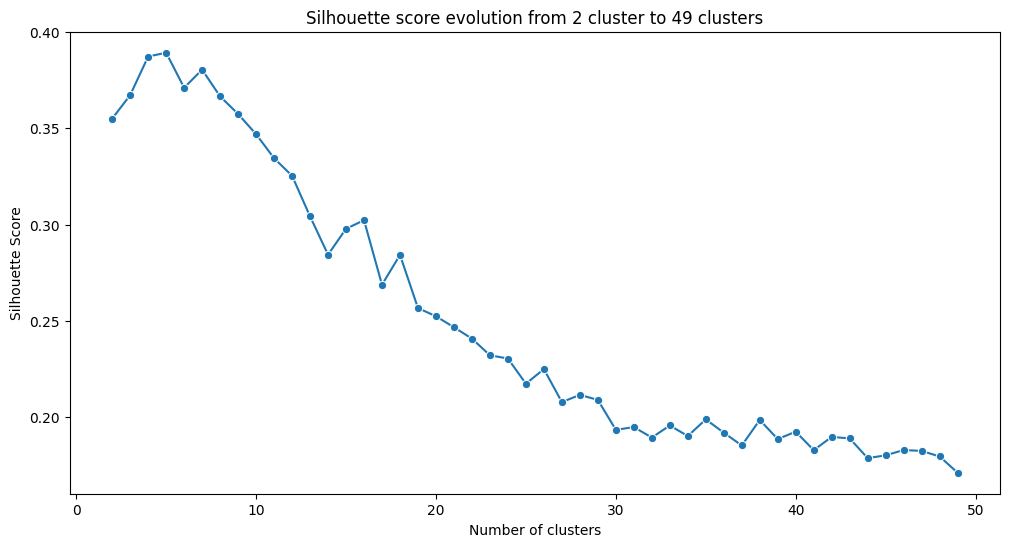

In [36]:
# to check the silhouette score with KMeans - supposedly, the best number of clusters to chose would be represented by the point that's closer to one

# importing necessary libraries
from sklearn.metrics import silhouette_score

# define the maximum number of clusters to evaluate
max_k = 50
# initialize an empty list to store silhouette scores for each number of clusters
sil_score = []

# iterate over the range of cluster numbers from 2 to max_k (exclusive)
for k in range(2, max_k):
    # create a KMeans clustering model with k clusters
    # fit the model to the scaled data (excluding the first two and last two columns)
    # obtain cluster labels for each sample
    labels = KMeans(n_clusters=k, random_state = 30).fit(scaled_songs.iloc[:, 2:-2]).labels_ # same as before, we use iloc to select only the numeric columns
    # calculate silhouette score for the clustering result and append it to the list
    sil_score.append(silhouette_score(scaled_songs.iloc[:, 2:-2], labels))
    # same as:
    # score = silhouette_score(scaled_songs.iloc[:, 2:-2], labels)
    # sil_score.append(score)

# create a figure and axis object for plotting
fig, ax = plt.subplots(figsize=(12, 6))
# set plot title,  # max_k-1 because range stops at max_k-1
plt.title(f'Silhouette score evolution from 2 cluster to {max_k-1} clusters')
# plot the silhouette scores against the number of clusters
sns.lineplot(x=range(2, max_k), y=sil_score, marker='o')
# set labels for x and y axes
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
# display the plot
plt.show()

In [37]:
# to cluster the songs with KMeans

# import necessary libraries
from sklearn.cluster import KMeans

# define the number of clusters, and random state for reproducibility
n_clusters = 25
random_state = 30

# create a KMeans clustering object with specified parameters
kmeans = KMeans(n_clusters = n_clusters, random_state = random_state)

# fit the KMeans model to the scaled numerical features of songs dataset
# using iloc to select only the numeric columns (excluding first two and last two columns)
kmeans.fit(scaled_songs.iloc[:, 2:-2])

KMeans(n_clusters=25, random_state=30)

In [38]:
# to create a data frame with the cluster label for each song

# create a copy of the scaled_songs DataFrame
labeled_songs = scaled_songs.copy()
# assign cluster labels from the fitted KMeans model to a new column called 'cluster'
labeled_songs["cluster"] = kmeans.labels_

# display the first row of the labeled_songs DataFrame to inspect the result
labeled_songs.head(1)

,name,artist,danceability,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,html,cluster
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.680455,0.763897,0.0,0.076797,0.696787,0.00006,0.987842,0.31066,0.5158,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...,14


In [40]:
# to take a sample of x songs from each cluster

# select specific columns from labeled_songs DataFrame to create audio_sample DataFrame
audio_sample = labeled_songs[['name', 'artist', 'cluster']]

# set the number of samples to select from each cluster
n = 5

# iterate over unique cluster labels in audio_sample DataFrame
for x in audio_sample['cluster'].unique():
    # select random samples from audio_sample where cluster equals current cluster label 'x'
    samples = audio_sample.query(f'cluster == {x}').sample(n=n)
    # print the selected samples
    print(samples)

                                                   name  \
3199  El Telefono                                   ...   
3295  Sola                                          ...   
1343  Love Shack                                    ...   
2770  Stars Troll - Radio Edit                      ...   
2689  Bounce (feat. Kelis) - Radio Edit             ...   

                                                artist  cluster  
3199      Héctor "El Father"                                 14  
3295      Héctor "El Father"                                 14  
1343  The B-52's                                             14  
2770  Kaskade                                                14  
2689  Calvin Harris                                          14  
                                                   name  \
2241  Right Thurr                                   ...   
166   Alegria                                       ...   
1142  It Never Rains in Southern California         ...   
3176  Israeli

In [41]:
# to explore individual (or more) clusters with .query()

labeled_songs.query('cluster == 2').sample(5)

,name,artist,danceability,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,html,cluster
3701,Unfit Earth ...,Napalm Death,0.328852,0.726729,1.0,0.214597,0.000012,0.825381,0.320162,0.297462,0.494173,6TcTjkptOtIF6sXyTxb76L,https://open.spotify.com/track/6TcTjkptOtIF6sX...,2
3924,The Suffering ...,Baphomet,0.279214,0.817450,1.0,0.156863,0.001335,0.826396,0.171226,0.151269,0.353694,6tP7aM4mZmteUSLlQMnMz9,https://open.spotify.com/track/6tP7aM4mZmteUSL...,2
3507,Seeds of the Suffering ...,Suffocation,0.344364,0.853542,1.0,0.184096,0.000045,0.931980,0.171226,0.400000,0.555559,0mUPCLUjXi0p69Ipepe98p,https://open.spotify.com/track/0mUPCLUjXi0p69I...,2
4390,Anteeksiannon synkkä varjo ...,Rippikoulu,0.172699,0.844593,1.0,0.062745,0.000003,0.971574,0.093009,0.060000,0.682555,44JqtD8YJ9tzupLYP2v5D5,https://open.spotify.com/track/44JqtD8YJ9tzupL...,2
3782,Blame It on God ...,Deicide,0.357808,0.882837,1.0,0.213508,0.016064,0.944162,0.202634,0.240609,0.582537,48JB1RF92JFSeCbzpixKf0,https://open.spotify.com/track/48JB1RF92JFSeCb...,2


In [42]:
# to see the distribution of songs between clusters

labeled_songs.value_counts('cluster').sort_values()

cluster
20     59
21     62
14     75
8      79
22     85
18    103
23    114
19    138
13    145
5     149
24    169
4     212
0     221
17    231
6     250
7     258
12    262
1     265
11    273
16    282
3     301
10    321
9     324
2     388
15    409
Name: count, dtype: int64

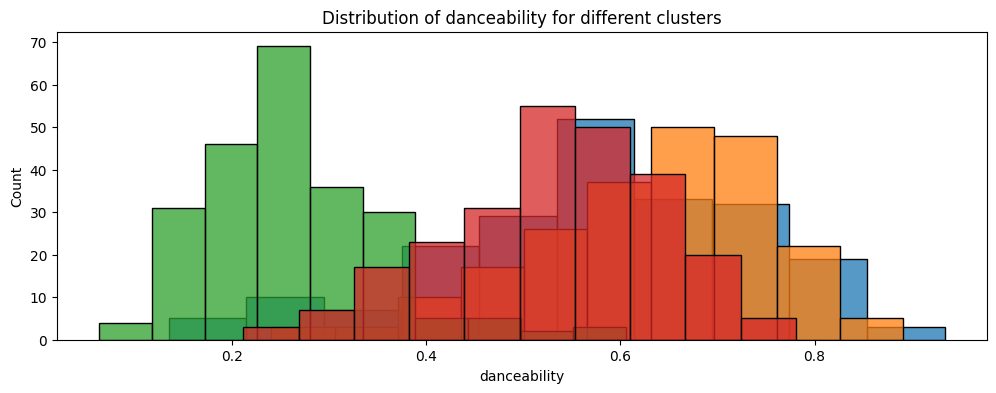

In [44]:
# to create histograms of different cluster per feature - in this case danceability, with seaborn

# create a figure and axis object for plotting with a specific size
fig, ax = plt.subplots(figsize=(12, 4))

# plotting histograms for danceability across different clusters
sns.histplot(data=labeled_songs.query('cluster == 4'), x='danceability', bins=10, ax=ax)
sns.histplot(data=labeled_songs.query('cluster == 0'), x='danceability', bins=10, ax=ax)
sns.histplot(data=labeled_songs.query('cluster == 17'), x='danceability', bins=10, ax=ax)
sns.histplot(data=labeled_songs.query('cluster == 6'), x='danceability', bins=10, ax=ax)

# uncomment the following line to add a legend
# plt.legend(labels=['Cluster 4', 'Cluster 0', 'Cluster 17', 'Cluster 6'])

# set plot title
plt.title('Distribution of danceability for different clusters')
# display plot
plt.show()

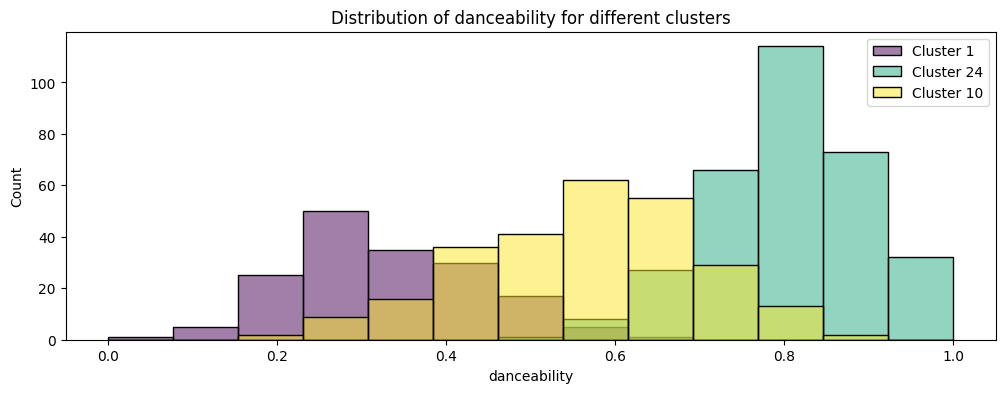

In [45]:
# other option for histograms, first selecting the clusters we want to plot and the using "hue" to plot them correctly

# create a figure and axis object for plotting with a specific size
fig, ax = plt.subplots(figsize=(12, 4))

# plot histograms for danceability across selected clusters using 'hue'
sns.histplot(data=labeled_songs.query('cluster == 1 | cluster == 24 | cluster == 10'),
             x='danceability',
             hue='cluster',  # use 'cluster' for coloring histograms by cluster
             multiple='layer',  # overlay histograms for different clusters
             palette='viridis_r',  # color palette for clusters
             ax=ax)  # plot on the specified axis 'ax'

# Uncomment the following lines to plot individual histograms without 'hue'
# sns.histplot(data=labeled_songs.query('cluster == 1'), x='danceability', ax=ax)
# sns.histplot(data=labeled_songs.query('cluster == 24'), x='danceability', ax=ax)
# sns.histplot(data=labeled_songs.query('cluster == 10'), x='danceability', ax=ax)

# add a legend to identify clusters
plt.legend(labels=['Cluster 1', 'Cluster 24', 'Cluster 10'])
# set plot title
plt.title('Distribution of danceability for different clusters')
# display plot
plt.show()

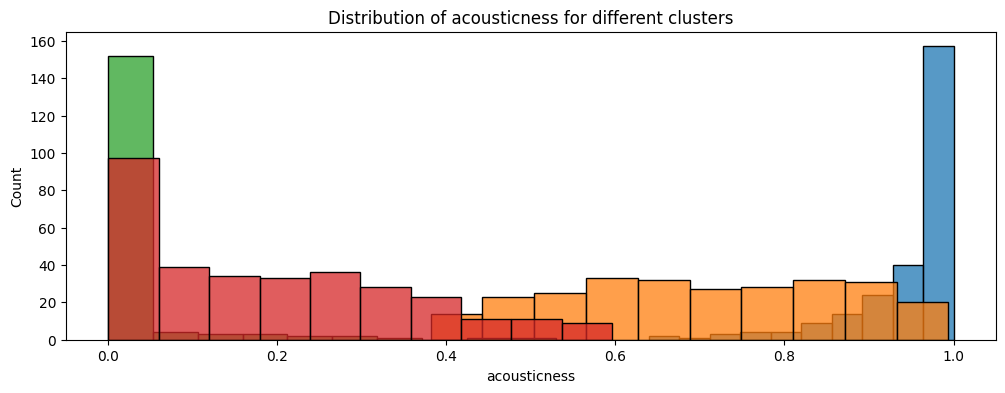

In [46]:
# create a figure and axis object for plotting with a specific size
fig, ax = plt.subplots(figsize=(12, 4))

# plot histograms for acousticness across different clusters
sns.histplot(data=labeled_songs.query('cluster == 7'), x='acousticness', bins = 10),
sns.histplot(data=labeled_songs.query('cluster == 1'), x='acousticness', bins = 10),
sns.histplot(data=labeled_songs.query('cluster == 24'), x='acousticness', bins = 10),
sns.histplot(data=labeled_songs.query('cluster == 10'), x='acousticness', bins = 10)

# uncomment the following line to add a legend
# plt.legend(labels=['Cluster 7', 'Cluster 1', 'Cluster 24', 'Cluster 10'])

# set plot title
plt.title('Distribution of acousticness for different clusters')
# display the plot
plt.show()

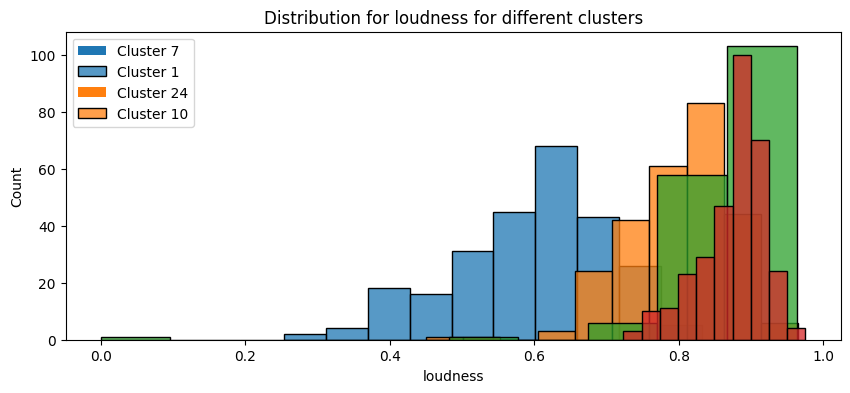

In [ ]:
# create a figure and axis object for plotting with a specific size
fig, ax = plt.subplots(figsize=(10, 4))

# plot histograms for loudness across different clusters
sns.histplot(data=labeled_songs.query('cluster == 7'), x='loudness', bins = 10),
sns.histplot(data=labeled_songs.query('cluster == 1'), x='loudness', bins = 10),
sns.histplot(data=labeled_songs.query('cluster == 24'), x='loudness', bins = 10),
sns.histplot(data=labeled_songs.query('cluster == 10'), x='loudness', bins = 10)

# add cluster legends
plt.legend(labels=['Cluster 7', 'Cluster 1', 'Cluster 24', 'Cluster 10'])
# set selected title
plt.title('Distribution for loudness for different clusters')
# display plot
plt.show()

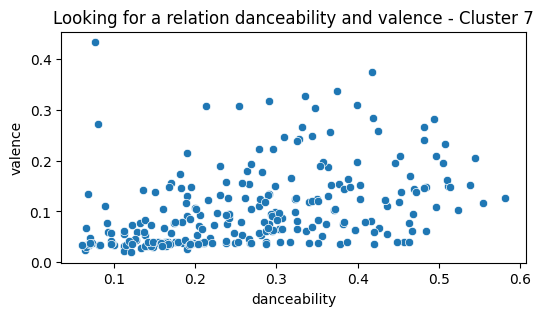

In [ ]:
#  create a figure and axis object for plotting with a specific size
fig, ax = plt.subplots(figsize=(6, 3))

# create a scatterplot to show correlation between danceability and valence
sns.scatterplot(data=labeled_songs.query('cluster == 7'), x='danceability', y='valence')

# set title
plt.title('Looking for a relation danceability and valence - Cluster 7')
# display plot
plt.show()

#To upload a playlist in Spotify

In [ ]:
# to install spotipy - to access Spotify

!pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.1/250.1 kB 6.5 MB/s eta 0:00:00


In [ ]:
# import necessary libraries

import spotipy
import pickle
from spotipy.oauth2 import SpotifyOAuth

In [ ]:
# user information from creating a developer account in spotify - with your user account

# define the scope of permissions needed for Spotify API access
scope = 'playlist-modify-public'
# specify your Spotify username
username = 'your_user_name'               # replace with your actual Spotify username
# define the URI where Spotify will redirect after authorization
redirectUri = 'your_redirect_uri'         # replace with your actual redirect URI
# your Spotify application's client ID and client secret
client_id = 'your_client_id'              # replace with your actual client ID
client_secret = 'your_client_secret'      # replace with your actual client secret

# obtain authorization token using SpotifyOAuth from spotipy library
token = SpotifyOAuth(scope=scope,
                     username=username,
                     client_id=client_id,
                     client_secret=client_secret,
                     redirect_uri=redirectUri,
                     open_browser=False  # set to False to prevent opening a browser for authentication (useful in some environments)
                     )

# create a Spotify object authenticated with the obtained token
spotifyObject = spotipy.Spotify(auth_manager=token)

# run each time you're gonna access Spotify

In [ ]:
# to create a playlist in Spotify with the clustered songs

# dictionary to store playlist information
playlist_collection = {}

# iterate through each cluster in labeled_songs to create playlists
for i in range(len(labeled_songs.groupby('cluster').count())):
    # define playlist name and description
    playlist_name = f'my_playlist_cluster_{i}'
    playlist_description = 'this is a test list'

    # create a new playlist on Spotify and retrieve its ID
    playlist_id = spotifyObject.user_playlist_create(user = username,
                                                     name = playlist_name,
                                                     public = True,
                                                     description = playlist_description)['id']

    # sample 5 track IDs from the current cluster in labeled_songs
    id_list = list(labeled_songs.loc[labeled_songs["cluster"] == i].sample(5).id)

    # generate Spotify URIs for the sampled track IDs
    uris = [f'spotify:track:{str(id).strip()}' for id in id_list]

    # add sampled tracks to the newly created playlist
    spotifyObject.user_playlist_add_tracks(user = username,
                                           playlist_id = playlist_id,
                                           tracks = uris)

    # store playlist name and ID in playlist_collection dictionary
    playlist_collection[playlist_name] = playlist_id

In [ ]:
# save playlist collection to a pickle file
with open("./playlists.pkl", "wb") as f:
    pickle.dump(playlist_collection, f)

# download the pickle file using Google Colab
from google.colab import files
files.download("./playlists.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# run each time you're gonna access Spotify (it's the same as above)

# define the scope of permissions needed for Spotify API access
scope = 'playlist-modify-public'
# specify your Spotify username
username = 'your_user_name'               # replace with your actual Spotify username
# define the URI where Spotify will redirect after authorization
redirectUri = 'your_redirect_uri'         # replace with your actual redirect URI
# your Spotify application's client ID and client secret
client_id = 'your_client_id'              # replace with your actual client ID
client_secret = 'your_client_secret'      # replace with your actual client secret

# obtain authorization token using SpotifyOAuth from spotipy library
token = SpotifyOAuth(scope=scope,
                     username=username,
                     client_id=client_id,
                     client_secret=client_secret,
                     redirect_uri=redirectUri,
                     open_browser=False  # set to False to prevent opening a browser for authentication (useful in some environments)
                     )

# create a Spotify object authenticated with the obtained token
spotifyObject = spotipy.Spotify(auth_manager=token)

# run each time you're gonna access Spotify

In [ ]:
# iterate through each cluster in labeled_songs and replace tracks in corresponding playlists
for i in range(len(labeled_songs.groupby('cluster').count())):
    # load playlist collection from a pickle file
    with open("/content/drive/MyDrive/playlists.pkl", "rb") as f:
        playlist_collection = pickle.load(f)

    # generate Spotify URIs for tracks in the current cluster
    uris = [f'spotify:track:{str(id).strip()}' for id in labeled_songs.loc[labeled_songs["cluster"] == i].sample(10).id]

    # retrieve playlist ID for the current cluster's playlist
    playlist_id = playlist_collection[f'my_playlist_cluster_{i}']

    # replace tracks in the playlist using Spotify API
    spotifyObject.user_playlist_replace_tracks(user = username,  # Spotify username
                                               playlist_id = playlist_id,  # ID of the playlist to modify
                                               tracks = uris)  # list of track URIs to replace in the playlist

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# An interesting page to explore playlists

# https://www.chosic.com/spotify-playlist-analyzer/?plid=2HXopyPthhapUcwN0p2hB6